In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

import gcpy
import gcpy.benchmark as gcbm

In [2]:
# Useful for development
#from importlib import reload
#reload(gcpy)
#reload(gcbm)

# Read input data

In [3]:
ds = xr.open_dataset('../../data/restart/initial_GEOSChem_rst.4x5_benchmark.nc')
ds = ds.squeeze(drop=True) # remove time dimension

In [4]:
ds['lev'] = np.arange(1, ds['lev'].size+1)

In [5]:
ds['lev']

<xarray.DataArray 'lev' (lev: 72)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72])
Coordinates:
  * lev      (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...

## Perturb original data

In [6]:
def make_noise(shape):
    noise = np.random.rand(*shape)
    noise = 1.0 + 0.1 * (noise - 0.5)
    return noise

In [7]:
ds_perturbed = ds.copy() # don't change original dataset
for name, dr in ds_perturbed.data_vars.items():
    dr *= make_noise(dr.shape)

In [8]:
ds_diff = ds - ds_perturbed

# Plotting layers

## Basic plot

In [9]:
dr = ds['TRC_O3'].isel(lev=0)
dr

<xarray.DataArray 'TRC_O3' (lat: 46, lon: 72)>
array([[  2.615237e-08,   2.615237e-08,   2.615237e-08, ...,   2.615237e-08,
          2.615237e-08,   2.615237e-08],
       [  2.622411e-08,   2.622632e-08,   2.623010e-08, ...,   2.620527e-08,
          2.622198e-08,   2.620175e-08],
       [  2.570759e-08,   2.548167e-08,   2.513250e-08, ...,   2.592743e-08,
          2.566281e-08,   2.570589e-08],
       ..., 
       [  8.588493e-09,   9.013182e-09,   8.793466e-09, ...,   8.650769e-09,
          8.041175e-09,   8.159272e-09],
       [  6.469575e-09,   6.469804e-09,   6.465895e-09, ...,   6.476197e-09,
          6.476856e-09,   6.473523e-09],
       [  6.460082e-09,   6.460082e-09,   6.460082e-09, ...,   6.460082e-09,
          6.460082e-09,   6.460082e-09]])
Coordinates:
    lev      int64 1
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:  O3 tracer


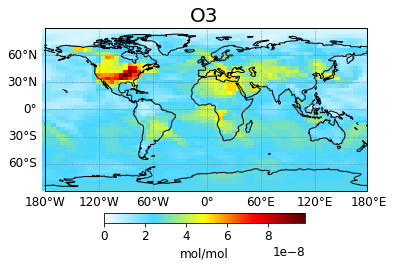

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[6,4],
                       subplot_kw={'projection': ccrs.PlateCarree()})
    
gcbm.plot_layer(dr, ax, fig, title='O3', unit=dr.units)

The input axis must be cartopy "GeoAxes", not just matplotlib "Axes".

In [11]:
type(ax)

cartopy.mpl.geoaxes.GeoAxesSubplot

AssertionError: Input axis must be cartopy GeoAxes! Can be created by: 
plt.axes(projection=ccrs.PlateCarree()) 
 or 
plt.subplots(n, m, subplot_kw={'projection': ccrs.PlateCarree()})

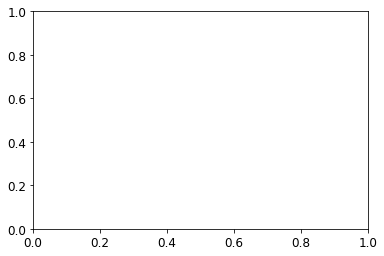

In [12]:
# fail on purpose
fig, ax = plt.subplots(1, 1, figsize=[6,4])
gcbm.plot_layer(dr, ax, fig, title='O3', unit=dr.units)

## Difference plot

In [13]:
dr_diff = ds_diff['TRC_O3'].isel(lev=0)
dr_diff

<xarray.DataArray 'TRC_O3' (lat: 46, lon: 72)>
array([[  9.352668e-10,   3.716078e-10,  -9.128798e-11, ...,  -3.804689e-11,
          1.223416e-09,   8.090371e-11],
       [  3.332253e-10,  -1.721514e-10,   6.583336e-10, ...,  -2.037105e-10,
         -1.454246e-10,   9.014356e-10],
       [ -8.607732e-10,   8.877845e-10,  -2.108388e-10, ...,   6.674996e-10,
         -9.267380e-10,   1.028103e-10],
       ..., 
       [  2.525007e-11,  -1.879870e-10,  -1.609568e-10, ...,  -1.294358e-10,
         -7.136497e-11,   1.259014e-10],
       [ -2.569824e-10,  -2.554150e-10,  -7.214517e-11, ...,  -2.896474e-10,
         -1.043890e-10,   1.235059e-10],
       [ -7.672433e-11,   3.512672e-11,  -1.888379e-10, ...,   2.755615e-10,
         -3.083451e-10,   1.184673e-10]])
Coordinates:
    lev      int64 1
  * lat      (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...

Quick note on attribute:

https://github.com/pydata/xarray/issues/1614

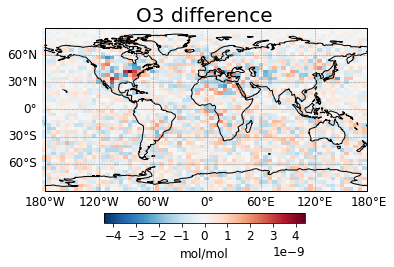

In [14]:
fig, ax = plt.subplots(1, 1, figsize=[6,4],
                       subplot_kw={'projection': ccrs.PlateCarree()})
    
gcbm.plot_layer(dr_diff, ax, fig, title='O3 difference', 
                diff=True, unit='mol/mol')

## Subplots

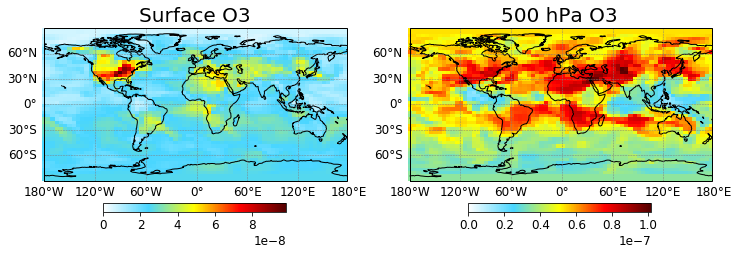

In [15]:
fig, axes = plt.subplots(1, 2, figsize=[12,4],
                       subplot_kw={'projection': ccrs.PlateCarree()})

gcbm.plot_layer(ds['TRC_O3'].isel(lev=0), axes[0], fig, title='Surface O3')
gcbm.plot_layer(ds['TRC_O3'].isel(lev=22), axes[1], fig, title='500 hPa O3')

## Multi-page pdf

### Standard surface+500 hpa plot

In [16]:
ds_surf = ds.isel(lev=0)
ds_500hpa = ds.isel(lev=22)

In [17]:
%%time
gcbm.make_pdf(ds_surf, ds_500hpa, 'Surface_and_500hPa.pdf', unit='mol/mol',
              title1='Surface', title2='500 hPa')

Benchmarking 119 variables
generating a 40-page pdf
Page: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 done!
CPU times: user 48.2 s, sys: 945 ms, total: 49.1 s
Wall time: 49.8 s


### Another combination

In [18]:
varlist = list(ds.data_vars.keys())[0:6]
varlist

['TRC_NO', 'TRC_O3', 'TRC_PAN', 'TRC_CO', 'TRC_ALK4', 'TRC_ISOP']

In [19]:
ds_subset = ds[varlist]
ds_subset

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72)
Coordinates:
  * lon       (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
  * lat       (lat) float32 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lev       (lev) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    TRC_NO    (lev, lat, lon) float64 2.561e-17 2.561e-17 2.561e-17 ...
    TRC_O3    (lev, lat, lon) float64 2.615e-08 2.615e-08 2.615e-08 ...
    TRC_PAN   (lev, lat, lon) float64 8.709e-12 8.709e-12 8.709e-12 ...
    TRC_CO    (lev, lat, lon) float64 6.75e-08 6.75e-08 6.75e-08 6.75e-08 ...
    TRC_ALK4  (lev, lat, lon) float64 1.753e-10 1.753e-10 1.753e-10 ...
    TRC_ISOP  (lev, lat, lon) float64 5.959e-14 5.959e-14 5.959e-14 ...
Attributes:
    Title:        COARDS/netCDF file created by BPCH2COARDS (GAMAP v2-17+)
    Conventions:  COARDS
    Format:       NetCDF-3
    Model:        GEOS5
    Delta_Lon:    5.0
    Delta_Lat:    4.0
    NLayers:      72
    

In [20]:
%%time
gcbm.make_pdf(ds_subset.isel(lev=9), ds_subset.isel(lev=19), 
             '10L_and_20L.pdf', unit='mol/mol',
              title1='10-th level', title2='20-th level')

Benchmarking 6 variables
generating a 2-page pdf
Page: 0 1 done!
CPU times: user 4.14 s, sys: 80.1 ms, total: 4.22 s
Wall time: 4.26 s


### Difference plot

In [21]:
ds_diff_surf = ds_diff.isel(lev=0)[varlist]
ds_diff_500hpa = ds_diff.isel(lev=22)[varlist]

In [22]:
%%time
gcbm.make_pdf(ds_diff_surf, ds_diff_500hpa, 'map_difference.pdf', unit='mol/mol',
              title1='Surface', title2='500 hPa', diff=True)

Benchmarking 6 variables
generating a 2-page pdf
Page: 0 1 done!
CPU times: user 2.28 s, sys: 29.8 ms, total: 2.31 s
Wall time: 2.32 s


# Plot zonal profile

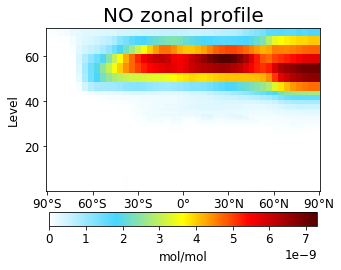

In [23]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
gcbm.plot_zonal(ds['TRC_NO'].isel(lon=0), ax, fig, 
                title='NO zonal profile', unit='mol/mol')

## Difference plot

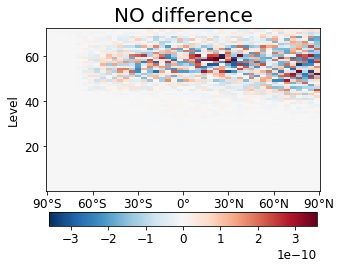

In [24]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
gcbm.plot_zonal(ds_diff['TRC_NO'].isel(lon=0), ax, fig, 
                title='NO difference', diff=True)

## Stratosphere only

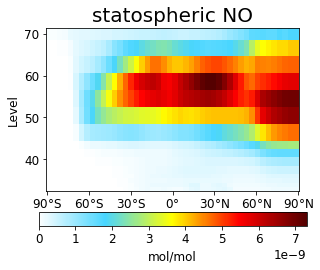

In [25]:
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
gcbm.plot_zonal(ds['TRC_NO'].isel(lon=0).isel(lev=slice(32, -1)), 
                ax, fig, title='statospheric NO', unit='mol/mol')

ax.set_aspect(3) # aspect-ratio

## Multi-page PDF

In [26]:
%%time
gcbm.make_pdf(ds.isel(lon=0), ds.mean(dim='lon'), 
              'zonal.pdf', on_map=False, unit='mol/mol',
              title1='180$\degree$', title2='zonal mean')

Benchmarking 119 variables
generating a 40-page pdf
Page: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 done!
CPU times: user 37.9 s, sys: 709 ms, total: 38.6 s
Wall time: 38.9 s


In [27]:
%%time
gcbm.make_pdf(ds_diff.isel(lon=0)[varlist], ds_diff.mean(dim='lon')[varlist], 
              'zonal_difference.pdf', on_map=False, diff=True, unit='mol/mol',
              title1='180$\degree$', title2='zonal mean')

Benchmarking 6 variables
generating a 2-page pdf
Page: 0 1 done!
CPU times: user 3.61 s, sys: 73.4 ms, total: 3.68 s
Wall time: 3.7 s
